MULTIPLE LINEAR REGRESSION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Load dataset
path = "../dataset/hour.csv"   # dataset folder inside PROJECTS_IIT

df = pd.read_csv(path)
print("Dataset shape:", df.shape)


Dataset shape: (17379, 17)


In [4]:
# Select features and target
X = df[['temp', 'atemp', 'hum', 'windspeed']]
y = df['cnt']


# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", round(mse, 2))


Mean Squared Error: 24053.73


In [10]:
# Model parameters
print("\nIntercept:", model.intercept_)
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(name, ":", round(coef, 2))



Intercept: 160.71307103146108
Coefficients:
temp : 89.13
atemp : 313.77
hum : -275.35
windspeed : 44.97


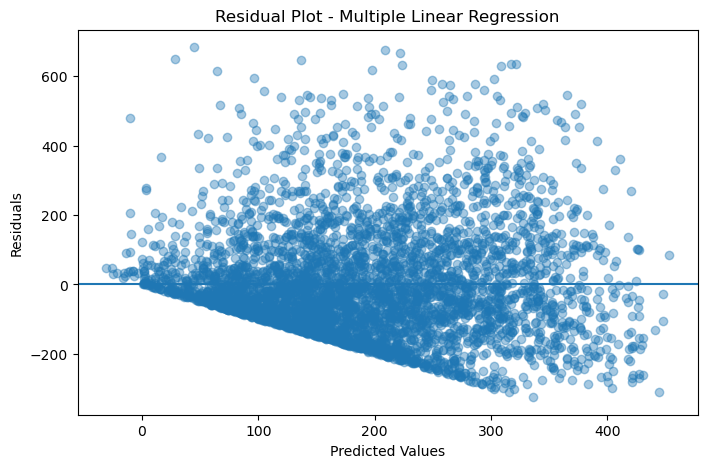

In [11]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Multiple Linear Regression")
plt.show()

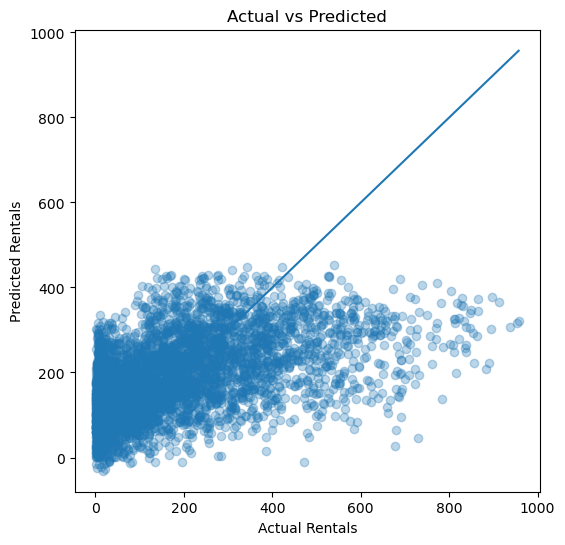

In [12]:
# Actual vs Predicted plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

In [14]:
print("\nSample Predictions:")
for i in range(5):
    print("Actual:", y_test.iloc[i],
          "| Predicted:", int(y_pred[i]))


Sample Predictions:
Actual: 374 | Predicted: 235
Actual: 126 | Predicted: 139
Actual: 24 | Predicted: 259
Actual: 365 | Predicted: 280
Actual: 90 | Predicted: 208
